# Task 3 - Approximating nonlinear vector fields

In [1]:
from utils import *

import numpy as np

import itertools
from tqdm import tqdm

import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

Let's load and plot the data of the task:

In [2]:
x0Data = np.loadtxt('./data/nonlinear_vectorfield_data_x0.txt')
x1Data = np.loadtxt('./data/nonlinear_vectorfield_data_x1.txt')

In [3]:
print(x0Data.shape)
print(x1Data.shape)

(2000, 2)
(2000, 2)


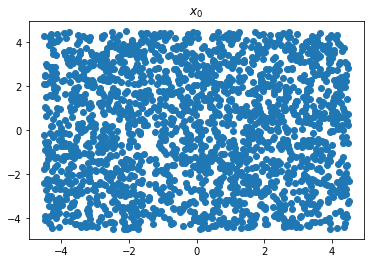

In [4]:
plt.scatter(x0Data[:,0], x0Data[:,1]);
plt.title("$x_0$");

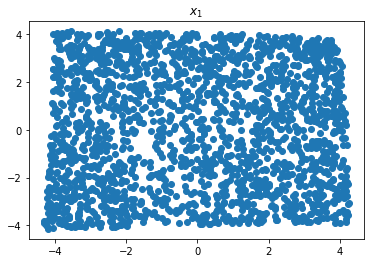

In [5]:
plt.scatter(x1Data[:,0], x1Data[:,1]);
plt.title("$x_1$");

Let's visualize how is the evolution of the vector field:

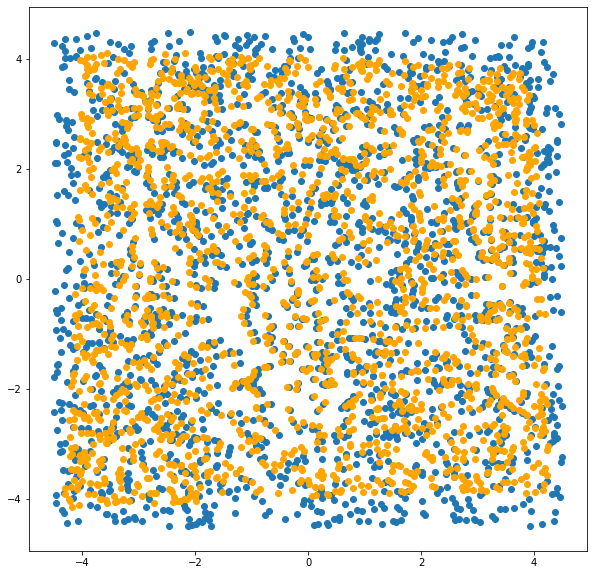

In [6]:
fig = plt.figure(figsize=(10,10))

# x_0 = blue dots; x_1 = orange color
plt.scatter(x0Data[:,0], x0Data[:,1]);
plt.scatter(x1Data[:,0], x1Data[:,1], color='orange');

## 1st Part - Estimation of the vector field describing $\psi$ with a linear operator

We have to estimate the linear vector field $\psi$ with a linear operator $A \in \mathbb{R}^{2 \times 2}$.

First, let's see how the field looks like:

In [7]:
v = x1Data - x0Data

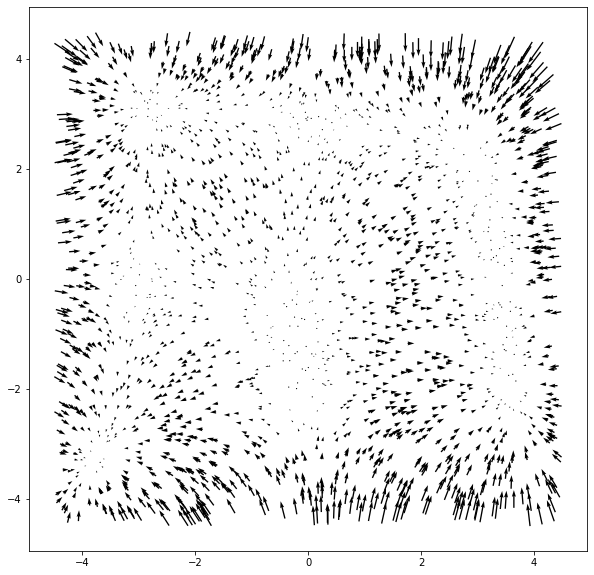

In [8]:
fig = plt.figure(figsize=(10, 10))
plt.quiver(x0Data[:,0], x0Data[:,1], v[:,0], v[:,1]);

Now, let's approximate the matrix $A \in \mathbb{R}^{2\times 2}$ such that

$$
\frac{d}{ds}\psi(s, x(t))\Bigr|_{\substack{s=0}} \approx \hat{f}_{linear}(x(t)) = Ax(t)
$$

In [9]:
# Perform least-squares minimization (y = ax + b) for the x
ax, bx = leastSquaresMinimization(np.column_stack((x0Data[:,0], v[:,0])))

# Perform least-squares minimization (y = ax + b) for the y
ay, by = leastSquaresMinimization(np.column_stack((x0Data[:,1], v[:,1])))

Let's simulate the obtained system matrix up to a time $T_{end} = 0.1$:

In [10]:
t = 0.1

vx = np.polyval([ax, bx], x0Data[:, 0]) * t
vy = np.polyval([ay, by], x0Data[:, 1]) * t

newX1 = np.array([vx + x0Data[:, 0], vy + x0Data[:, 1]]).T

Compute the MSE:

In [11]:
np.mean(np.square(np.subtract(x1Data ,newX1)))

0.02396692045241409

## 2nd Part - Approximate the vector field using Radial Basis Functions

In [12]:
possibleL = list(range(100, 1000, 100))
possibleEpsilon = [0.005, 0.05, 0.1, 0.15, 0.2, 0.5, 0.8, 1.0]

minimumMSE = 10000
mimumL = None
minimumEpsilon = None
for L, epsilon in tqdm(list(itertools.product(possibleL, possibleEpsilon))):
    x = approximateNonLinearFunction(np.column_stack((x0Data[:,0], v[:,0])), L, epsilon)
    y = approximateNonLinearFunction(np.column_stack((x0Data[:,1], v[:,1])), L, epsilon)
    
    mse = np.mean(np.square(np.subtract(x1Data, np.column_stack((x, y)))))
    
    if mse < minimumMSE:
        minimumL = L
        minimumEpsilon = epsilon
        minimumMSE = mse

print("The selected parameters are L = {} and Epsilon = {} with MSE = {}".format(minimumL, minimumEpsilon, minimumMSE))

100%|██████████| 72/72 [06:22<00:00,  5.31s/it]

The selected parameters are L = 100 and Epsilon = 0.005 with MSE = 6.441594947709239


We have that the combination with less MSE is L = 100 and $\epsilon$ = 0.005. Let's recover and plot the function together with the original data:

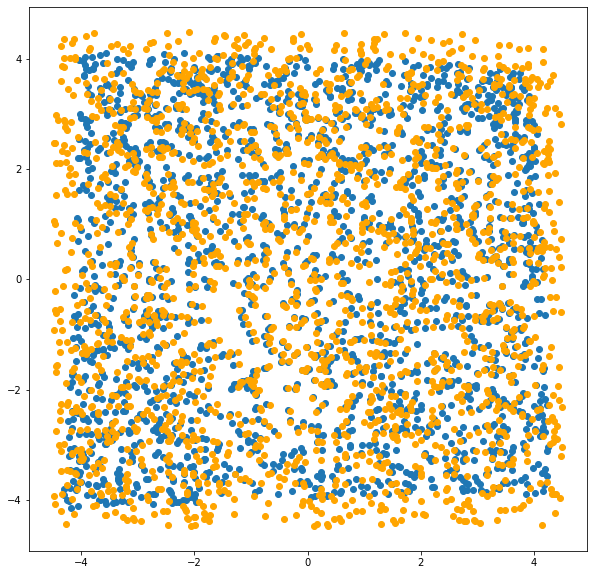

In [13]:
epsilon = 0.005
L = 100
x = approximateNonLinearFunction(np.column_stack((x0Data[:,0], v[:,0])), L, epsilon)
y = approximateNonLinearFunction(np.column_stack((x0Data[:,1], v[:,1])), L, epsilon)    

mse = np.mean(np.square(np.subtract(x1Data, np.column_stack((x, y)))))

fig = plt.figure(figsize=(10,10))

# Original x_1 = blue; Approximated x_1 = orange
plt.scatter(x1Data[:,0], x1Data[:,1]);
plt.scatter(x0Data[:,0] + x, x0Data[:,1] + y, color='orange');

## 3rd Part - The evolution of the system

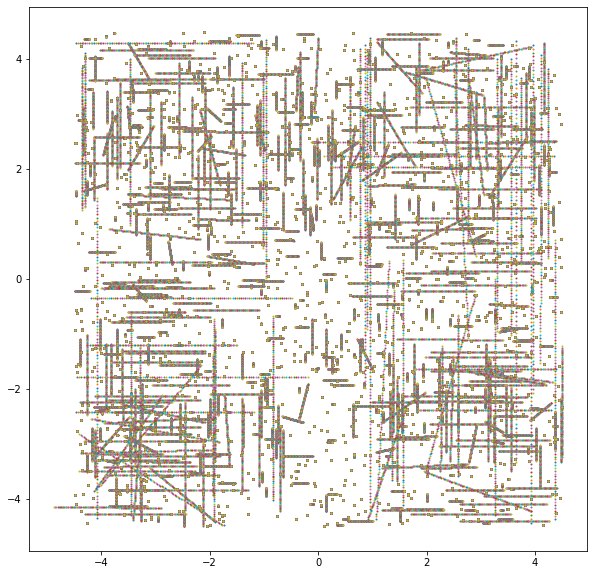

In [14]:
fig = plt.figure(figsize=(10,10))
for t in np.arange(0.1,10.0, 0.1):
    plt.scatter((x0Data[:,0] + x*t), (x0Data[:,1] + y*t), s=1)
plt.show()